## Data 불러오기 및 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# 데이터 불러오기

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
# 사용하지 않을 Series 제거

titanic.drop(['deck','class','who','alive','embark_town','embarked'],axis=1,inplace=True)

In [101]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,True,False
1,1,1,female,38.0,1,0,71.2833,False,False
2,1,3,female,26.0,0,0,7.9250,False,True
3,1,1,female,35.0,1,0,53.1000,False,False
4,0,3,male,35.0,0,0,8.0500,True,True


In [105]:
titanic.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
2,0.472826,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
3,0.242363,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [28]:
# Null값 확인

titanic.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
adult_male      0
alone           0
dtype: int64

## 데이터 분석

### 생존인원 확인. 0 : 사망, 1 : 생존

In [102]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### 남녀비율 확인

In [32]:
sexper=titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

## 시각화 및 분석

### class별 나이분포

          age                                                    
        count       mean        std   min   25%   50%   75%   max
pclass                                                           
1       186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
2       173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
3       355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0


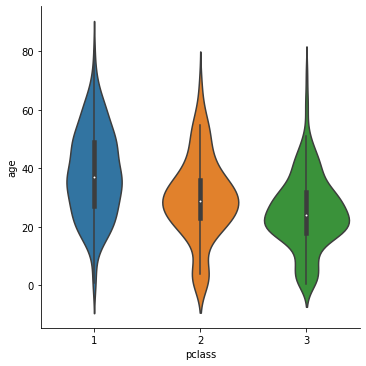

In [52]:
# 필요 series 추출
class_age= titanic.loc[:,['pclass','age']]

# null값 제거
class_age.dropna(inplace=True)

# 통계분석
print(class_age.groupby('pclass').describe())

# 시각화 진행
sns.catplot(x='pclass', y='age', data=class_age, kind='violin')

# 분석 결과 : 높은 등급의 탑승객일수록 나이가 많아진다.

### 일행 여부 및 class 별 생존확률

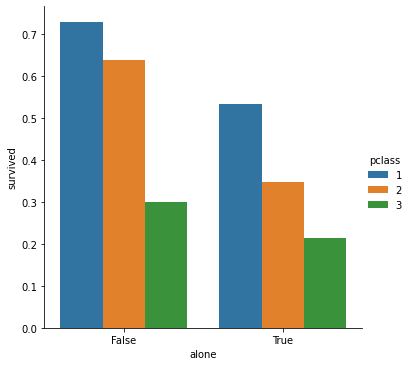

In [80]:
# 필요 series 추출
alone_sur= titanic.loc[:,['alone','survived','pclass']]

# null값 제거
alone_sur.dropna(inplace=True)

# 통계분석
alone_sur_mean= alone_sur.groupby(['alone','pclass']).mean()
alone_sur_mean.reset_index(inplace = True)

# 시각화 진행
sns.catplot(x='alone', y='survived', data=alone_sur_mean, hue='pclass',kind='bar')

# 분석 결과 : 전체적으로 혼자 온 사람보다 일행이 있는 사람의 생존확률이 높고,
# 높은 Class에 탑승한 승객의 생존 확률이 더 높다.

### 생존자 특징

<AxesSubplot:xlabel='Age_cat', ylabel='survived'>

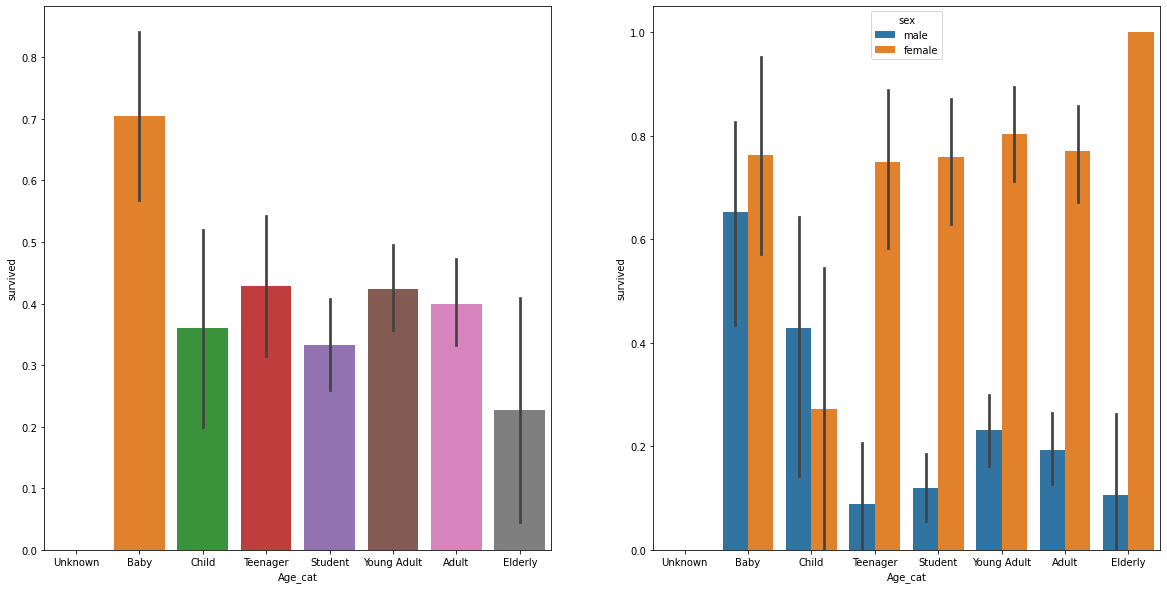

In [103]:
# 필요 series 추출
class_age_survived= titanic.loc[:,['pclass','age','survived','sex']]

# null값 제거
class_age_survived.dropna(inplace =True)

# 나이대 분류 함수 정의
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    return cat

# 사이즈 정의
fig, ax = plt.subplots(figsize=(20, 10),ncols=2)

# order 기준 정의
names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# 나이대 Columns 생성
class_age_survived['Age_cat'] = class_age_survived['age'].apply(lambda x : get_category(x))

# 시각화 진행
# 나이대별 생존률
sns.barplot(x='Age_cat', y = 'survived',data=class_age_survived, order=names, ax = ax[0])
# 나이대 및 성별 생존률
sns.barplot(x='Age_cat', y = 'survived', hue='sex',data=class_age_survived, order=names , ax = ax[1])

# 분석 결과 : 5세 이하의 생존률이 가장 높고, 대체적으로 여성의 생존률이 높았다. 또한 나이가 많을수록 생존률이 떨어졌다.